In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd '/Users/rajeshprabhakar/Desktop/Datasets'

[WinError 3] The system cannot find the path specified: "'/Users/rajeshprabhakar/Desktop/Datasets'"
C:\Users\Ashish\Documents


In [3]:
wholesaledata=pd.read_csv('Wholesale customers data.csv')

In [4]:
wholesaledata.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# Clustering based on Products Data only
wholesaledata=wholesaledata.drop(['Channel','Region'],axis=1)

In [6]:
# Is there any relationship between these variables?
wholesaledata.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


array([[<AxesSubplot:xlabel='Fresh', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Milk', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Delicassen', ylabel='Fresh'>],
       [<AxesSubplot:xlabel='Fresh', ylabel='Milk'>,
        <AxesSubplot:xlabel='Milk', ylabel='Milk'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Milk'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Milk'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>,
        <AxesSubplot:xlabel='Delicassen', ylabel='Milk'>],
       [<AxesSubplot:xlabel='Fresh', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Milk', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Grocery'>,
        <AxesSubplot:xlabel

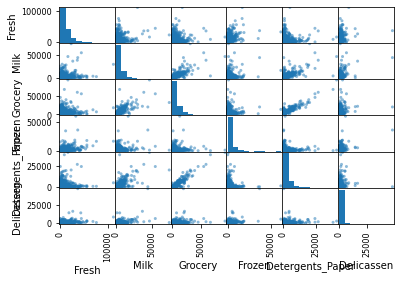

In [7]:
pd.plotting.scatter_matrix(wholesaledata)

In [8]:
from sklearn.cluster import KMeans

In [9]:
cluster=[]
k=range(1,15)
for i in k:
    kmeansmodel=KMeans(n_clusters=i)
    kmeansmodel.fit(wholesaledata)
    cluster.append(kmeansmodel.inertia_)

C:\Users\Ashish\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


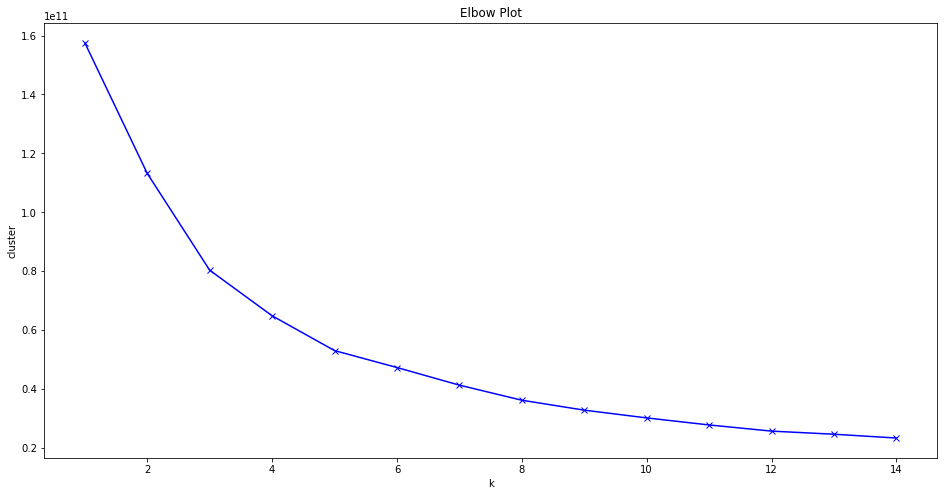

In [10]:
plt.figure(figsize=(16,8))
plt.plot(k,cluster,'bx-')
plt.xlabel('k')
plt.ylabel('cluster')
plt.title('Elbow Plot')
plt.show()

In [11]:
clustfinal=KMeans(n_clusters=2)

In [12]:
clustfinal=clustfinal.fit(wholesaledata)

In [13]:
wholesaledata['kmeans']=clustfinal.predict(wholesaledata)

In [14]:
wholesaledata.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,kmeans
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1


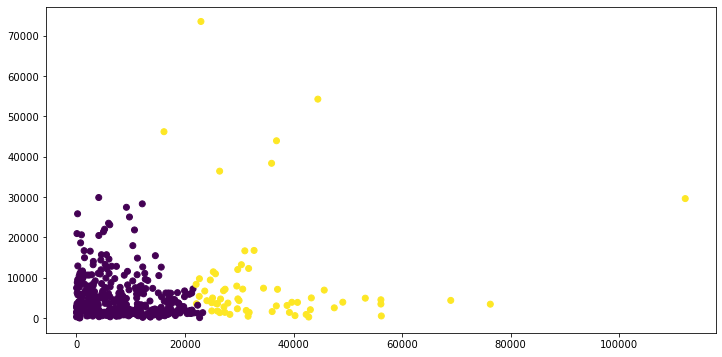

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(wholesaledata.iloc[:,0],
            wholesaledata.iloc[:,1],
            c=clustfinal.labels_.astype(float))

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
silhouette_score(wholesaledata,wholesaledata.kmeans)
# silhouttescore is close to Zero indicating overlapping clusters
# silhouttescore of 1 - Clusters are Good
# silhouttescore of -1 - Clusters are wrong

0.5115333901825583